# 🎯 The Negative Binomial Distribution — An Intuitive Guide

The **negative binomial distribution** is a **discrete probability distribution** that models how many *trials* are needed to achieve a fixed number of *successes* when each trial has the same probability of success.

Think of it as the **generalization of the geometric distribution**:

- **Geometric** → number of trials until the *first* success  
- **Negative binomial** → number of trials until the *r‑th* success

---

# 🧠 Core Idea

You repeat independent Bernoulli trials (success/failure), each with success probability $p$.  
You stop once you’ve observed **r successes**.

The random variable $X$ = total number of trials needed to get those $r$ successes.

---

# 📌 Probability Mass Function (PMF)

The probability that the $r$-th success occurs on trial $x$ is:

$$
P(X = x) = \binom{x-1}{r-1} p^r (1-p)^{x-r}
$$

This comes from:

- Getting **r–1 successes** in the first $x-1$ trials  
- Then getting a **success** on the $x$-th trial

---

# 📏 Support

$$
x = r, r+1, r+2, \ldots
$$

You need at least $r$ trials to get $r$ successes.

---

# 📊 Mean and Variance

From the standard formulas:

- **Mean:**  
  $$
  \mathbb{E}[X] = \frac{r}{p}
  $$

- **Variance:**  
  $$
  \mathrm{Var}(X) = \frac{r(1-p)}{p^2}
  $$

---

# 🧩 When to Use It

Use the negative binomial distribution when:

- You have **independent** repeated trials  
- Each trial has **two outcomes** (success/failure)  
- Success probability **p is constant**  
- You want the distribution of the **number of trials** needed to achieve **r successes**

Common examples:

- Number of calls until you reach your 10th completed survey  
- Number of die rolls until the 5th six appears  
- Number of defective items inspected until the 3rd defect is found

---

# 🔍 Example

A surveyor needs **3 completed surveys**, each with success probability $p = 0.09$.  
The probability the **3rd success** occurs on the **10th call** is:

$$
P(X=10) = \binom{9}{2} (0.09)^3 (0.91)^7 \approx 0.01356
$$

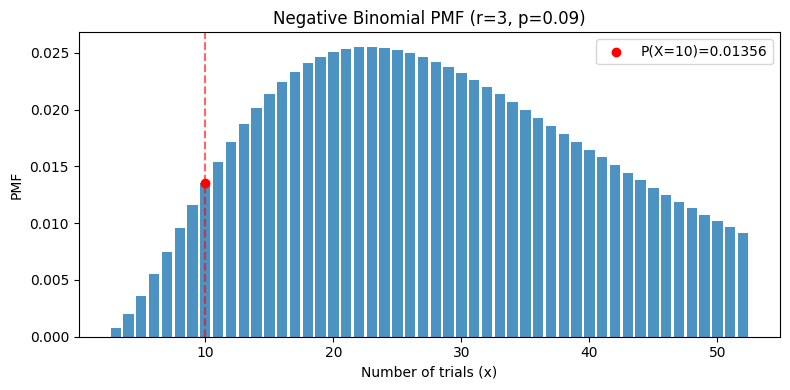

In [4]:
from scipy.stats import nbinom
import numpy as np
import matplotlib.pyplot as plt

r = 3
p = 0.09
x = 10

x_vals = np.arange(r, r + 50)
# scipy's nbinom.pmf(k, n, p) gives P(#failures = k) before n successes
pmf = nbinom.pmf(x_vals - r, r, p)
prob = nbinom.pmf(x - r, r, p)

plt.figure(figsize=(8,4))
plt.bar(x_vals, pmf, color='C0', alpha=0.8, align='center')
plt.scatter([x], [prob], color='red', zorder=5, label=f'P(X={x})={prob:.5f}')
plt.axvline(x, color='red', linestyle='--', alpha=0.6)
plt.xlabel('Number of trials (x)')
plt.ylabel('PMF')
plt.title(f'Negative Binomial PMF (r={r}, p={p})')
plt.legend()
plt.tight_layout()
plt.show()

Here’s the clean, intuitive way to understand it, Peter — and I’ll lean into the statistical intuition you enjoy.

---

# 📘 What the CDF of the Negative Binomial Distribution *Tells You*

For a negative binomial random variable $X$ — the number of trials needed to achieve $r$ successes with success probability $p$ — the **cumulative distribution function (CDF)** answers one core question:

### 🎯 **“What is the probability that I will achieve the $r$-th success on or before trial $k$?”**

Formally:

$$
F(k) = P(X \le k)
     = \sum_{x=r}^{k} \binom{x-1}{r-1} p^{\,r} (1-p)^{\,x-r}
$$

This means:

- You’re summing the probabilities of hitting the $r$-th success **exactly on trial $r$, or $r+1$, or …, or $k$**.
- It accumulates all the PMF values up to $k$.

---

# 🧠 Why this matters intuitively

The negative binomial distribution models **waiting time** until the $r$-th success.

So the CDF tells you:

- How likely it is that you’ll reach your goal (the $r$-th success) **within a certain number of attempts**.
- How “fast” the process tends to achieve successes.
- How extreme or typical a particular observed waiting time is.

---

# 📌 Example intuition

Suppose:

- $r = 3$ successes
- $p = 0.5$
- You ask: *“What’s the probability I get 3 heads within the first 6 coin flips?”*

That is exactly:

$$
F(6) = P(X \le 6)
$$

The CDF gives you that probability.

---

# 🧩 How it differs from the PMF

| Concept | Meaning |
|--------|---------|
| **PMF** | Probability the $r$-th success occurs **exactly** on trial $k$. |
| **CDF** | Probability the $r$-th success occurs **on or before** trial $k$. |